In [1]:
from carbon.helpers.stdimports import *
#from carbon.helpers.pdread import *
from carbon.helpers import j, strategy, pdread, Params
from carbon.helpers.simulation import run_sim, plot_sim

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [12,6]
print_version(require="2.2.3")

Carbon v2.3-BETA1 (22/Jan/2022)
CarbonSimulatorUI v2.4 (12/Jan/2023)
CarbonOrderUI v1.6.1 (21/Jan/2023)


# Carbon Simulation - Demo 7-3 (frozen data)

## Setup

### Parameter

In [2]:
params = Params(
    plotRanges        = True,    # whether to shade the ranges
    plotMargP         = True,    # whetger to plot the marginal price for the ranges
    plotBuy           = True,    # whether to plot buy (bid) ranges and marginal prices
    plotSell          = True,    # whether to plot sell (ask) ranges and marginal prices
    plotPrice         = True,    # whether to plot the price
    plotValueTotal    = True,    # whether to plot the aggregate portfolio value
    plotValueCsh      = True,   # whether to plot the cash portion of the portfolio value
    plotValueRsk      = False,   # whether to plot the risk asset portion of the portfolio value
)

### Generated output

If `OUTPATH` is `None`, output will not be saved, otherwise it will be saved to the indicated directory (use `"."` for current)

In [3]:
OUTPATH = "/Users/skl/Desktop/sim7-3"       # uncomment to save charts in specific location
OUTPATH = "."                               # uncomment to save charts in current directory
OUTPATH = None                              # uncomment to not save charts
if OUTPATH and OUTPATH != ".":
    !mkdir {OUTPATH}
    !rm {OUTPATH}/*.png
print(f"OUTPATH = {OUTPATH}")

OUTPATH = None


### Path data
filename determines collection, eg `RANPTH-05000-0000` is sig=50% vol and mu=0% drift; see available collections in the `ls` command below

In [4]:
DATAID = "RANPTH-05000-0000"

DATAPATH = "../data"
DATAFN = j(DATAPATH, f"{DATAID}.pickle")
print(f"Chose data id {DATAID}")

Chose data id RANPTH-05000-0000


In [5]:
!ls {DATAPATH}/*.pickle

../data/RANPTH-00500-0000.pickle ../data/RANPTH-05000-0000.pickle
../data/RANPTH-01000-0000.pickle ../data/RANPTH-07500-0000.pickle
../data/RANPTH-02000-0000.pickle ../data/RANPTH-10000-0000.pickle


### Strategies

This is the list of strategies to be tested against the paths. Note: it is recommended to always to a minimal amount of tokens into either side of the strategy in order to ensure that that marginal price is well defined. For the simulation it does not make a difference, provided the amounts are small. 

In [6]:
# strats = (
#     strategy.from_mwh(m=100, g=0.10, w=0.05, amt_rsk=1, amt_csh=0),
#     strategy.from_mwh(m=100, g=0.20, w=0.05, amt_rsk=1, amt_csh=0),
#     strategy.from_mwh(m=100, g=0.10, w=0.20, amt_rsk=1, amt_csh=0),
#     strategy.from_mwh(m=100, g=0.20, w=0.20, amt_rsk=1, amt_csh=0),
# )
# #strats

In [7]:
strats = (
    strategy.from_mwh(m=100, g=0.02, w=0.13, amt_rsk=1, amt_csh=0.001),
    strategy.from_mwh(m=100, g=0.01, w=0.02, amt_rsk=1, amt_csh=0.001),
    [strategy.from_mwh(m=100, g=0.01, w=0.02, amt_rsk=1, amt_csh=0.001),
    strategy.from_mwh(m=100, g=0.02, w=0.1, amt_rsk=1, amt_csh=0.001)],
#     strategy.from_mwh(m=100, g=0.20, w=0.05, amt_rsk=1, amt_csh=0),
#     strategy.from_mwh(m=100, g=0.10, w=0.20, amt_rsk=1, amt_csh=0),
#     strategy.from_mwh(m=100, g=0.20, w=0.20, amt_rsk=1, amt_csh=0),
)

## Simulation

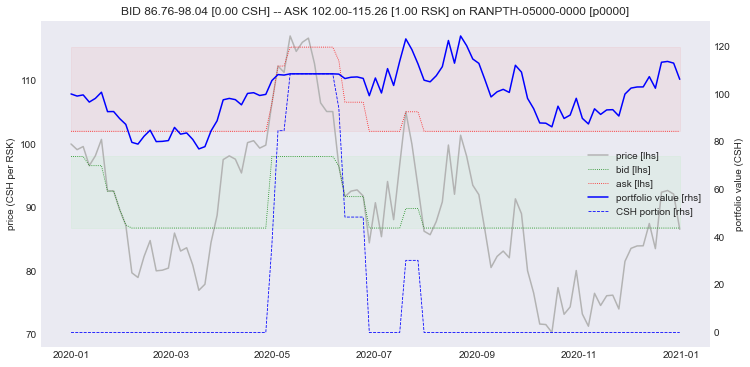

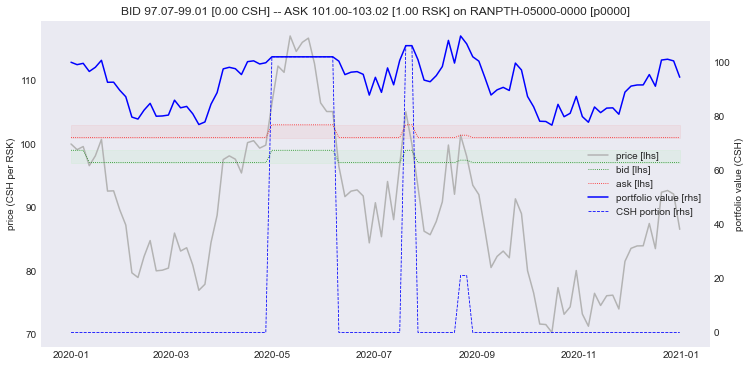

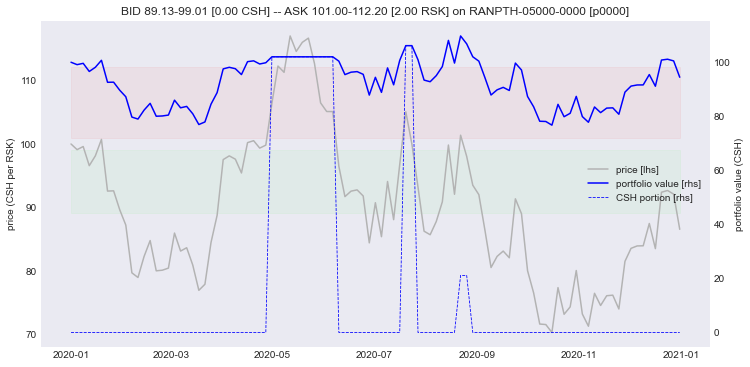

In [8]:
for colnm in ["p0000", "p0001", "p0002"][:1]:
    for ix, strat in enumerate(strats):
    
        path = pdread(DATAFN, colnm)
        simresults = run_sim(strat, path)
        plot_sim(strat, path, simresults, f"{DATAID} [{colnm}]", params)
        
        # save charts
        if isinstance(OUTPATH, str):
            plt.savefig(j(OUTPATH, f"{DATAID}-{colnm}-{ix}.png"))
        plt.show()

In [9]:
if OUTPATH:
    !ls {OUTPATH}/*.png

In [10]:
if OUTPATH and OUTPATH != ".":
    filelist = os.listdir(OUTPATH)
    filelist = [fn for fn in filelist if fn[-4:]==".png"]
    markdown = "\n\n".join(f"![]({OUTPATH}/{fn})" for fn in filelist)
    fsave(markdown, "_sim-charts.md", OUTPATH)
    !pandoc {OUTPATH}/_sim-charts.md -o {OUTPATH}/_sim-charts.docx